In [ ]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
import seaborn as sns
from collections import Counter
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Load dataset
kualitas = pd.read_csv('kualitas.csv')
kualitas.head()

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


In [ ]:
# Menampilkan info
kualitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PH              600 non-null    float64
 1   cahaya          590 non-null    object 
 2   intensitas air  616 non-null    object 
 3   suhu            589 non-null    float64
 4   PPM             611 non-null    float64
 5   tinggi air      616 non-null    int64  
 6   aksi            616 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 33.8+ KB


In [ ]:
#Melihat pembagian data pada kolom label yaitu 'aksi'
kualitas['aksi'].value_counts()

Tidak melakukan apa-apa                 473
Hidupkan Lampu                           92
Hidupkan Lampu dan Pompa nutrisi TDS     39
Hidupkan Pompa nutrisi TDS               12
Name: aksi, dtype: int64

In [ ]:
kualitas['cahaya'].value_counts()

Ada          302
Tidak ada    288
Name: cahaya, dtype: int64

In [ ]:
kualitas['intensitas air'].value_counts()

Cukup            154
Tinggi           154
Rendah sekali    154
Rendah           154
Name: intensitas air, dtype: int64

In [ ]:
kualitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PH              600 non-null    float64
 1   cahaya          590 non-null    object 
 2   intensitas air  616 non-null    object 
 3   suhu            589 non-null    float64
 4   PPM             611 non-null    float64
 5   tinggi air      616 non-null    int64  
 6   aksi            616 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 33.8+ KB


In [ ]:
missing_data = pd.DataFrame({'total_missing': kualitas.isnull().sum(), 'perc_missing': (kualitas.isnull().sum()/616)*100})
missing_data

,total_missing,perc_missing
PH,16,2.597403
cahaya,26,4.220779
intensitas air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
tinggi air,0,0.000000
aksi,0,0.000000


In [ ]:
kualitas.describe()

,PH,suhu,PPM,tinggi air
count,600.000000,589.000000,611.000000,616.000000
mean,6.655167,29.364007,1032.836334,288.173701
std,3.043234,14.937524,632.614766,622.457710
min,0.000000,-300.000000,1.000000,0.000000
25%,5.500000,27.100000,487.500000,50.000000
50%,6.500000,29.900000,991.000000,230.000000
75%,7.700000,33.000000,1603.500000,429.500000
max,14.000000,40.600000,2149.000000,12000.000000


In [ ]:
# Menetukan Aksi
# Hapus pH karena tidak berpengaruh pada aksi
del kualitas["PH"]
kualitas.head()

,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


In [ ]:
# Hapus tinggi air karena tidak berpengaruh pada aksi
del kualitas["tinggi air"]
kualitas.head()

,cahaya,intensitas air,suhu,PPM,aksi
0,Ada,Tinggi,27.0,188.0,Hidupkan Lampu dan Pompa nutrisi TDS
1,Ada,Tinggi,26.9,79.0,Hidupkan Lampu dan Pompa nutrisi TDS
2,Ada,Tinggi,27.0,11.0,Hidupkan Lampu dan Pompa nutrisi TDS
3,Ada,Tinggi,27.1,345.0,Tidak melakukan apa-apa
4,NaN,Tinggi,27.1,602.0,Tidak melakukan apa-apa


In [ ]:
kualitas.columns

Index(['cahaya', 'intensitas air', 'suhu', 'PPM', 'aksi'], dtype='object')

In [ ]:
column = ['cahaya', 'intensitas_air', 'suhu', 'PPM', 'aksi']
kualitas.columns = column

In [ ]:
kualitas.columns

Index(['cahaya', 'intensitas_air', 'suhu', 'PPM', 'aksi'], dtype='object')

In [ ]:
missing_data = pd.DataFrame({'total_missing': kualitas.isnull().sum(), 'perc_missing': (kualitas.isnull().sum()/616)*100})
missing_data

,total_missing,perc_missing
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
aksi,0,0.000000


In [ ]:
# Mengubah data ke numerical
def getNumber(str):
    if str=="Rendah sekali":
        return 1.0
    elif str=="Rendah":
        return 2.0
    elif str=="Cukup":
        return 3.0
    elif str=="Tinggi":
        return 4.0
    else:
        return str
kualitas["intensitas_air"]=kualitas["intensitas_air"].apply(getNumber)

kualitas.head()

,cahaya,intensitas_air,suhu,PPM,aksi
0,Ada,4.0,27.0,188.0,Hidupkan Lampu dan Pompa nutrisi TDS
1,Ada,4.0,26.9,79.0,Hidupkan Lampu dan Pompa nutrisi TDS
2,Ada,4.0,27.0,11.0,Hidupkan Lampu dan Pompa nutrisi TDS
3,Ada,4.0,27.1,345.0,Tidak melakukan apa-apa
4,NaN,4.0,27.1,602.0,Tidak melakukan apa-apa


In [ ]:
def getNumber(str):
    if str=="Tidak melakukan apa-apa":
        return 1.0
    elif str=="Hidupkan Lampu":
        return 2.0
    elif str=="Hidupkan Pompa nutrisi TDS":
        return 3.0
    elif str=="Hidupkan Lampu dan Pompa nutrisi TDS":
        return 4.0
    else:
        return str
kualitas["aksi"]=kualitas["aksi"].apply(getNumber)

kualitas.head()

,cahaya,intensitas_air,suhu,PPM,aksi
0,Ada,4.0,27.0,188.0,4.0
1,Ada,4.0,26.9,79.0,4.0
2,Ada,4.0,27.0,11.0,4.0
3,Ada,4.0,27.1,345.0,1.0
4,NaN,4.0,27.1,602.0,1.0


In [ ]:
def getNumber(str):
    if str=="Ada":
        return 0.0
    elif str=="Tidak ada":
        return 1.0
    else:
        return str
kualitas["cahaya"]=kualitas["cahaya"].apply(getNumber)

kualitas.head()

,cahaya,intensitas_air,suhu,PPM,aksi
0,0.0,4.0,27.0,188.0,4.0
1,0.0,4.0,26.9,79.0,4.0
2,0.0,4.0,27.0,11.0,4.0
3,0.0,4.0,27.1,345.0,1.0
4,NaN,4.0,27.1,602.0,1.0


In [ ]:
missing_data = pd.DataFrame({'total_missing': kualitas.isnull().sum(), 'perc_missing': (kualitas.isnull().sum()/616)*100})
missing_data

,total_missing,perc_missing
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
aksi,0,0.000000


In [ ]:
# Mengelompokkan missing value
column_missing = ['cahaya', 'intensitas_air', 'suhu', 'PPM']
column_missing

['cahaya', 'intensitas_air', 'suhu', 'PPM']

In [ ]:
# Menyelesaikan missing value
for col in column_missing:
  kualitas[col].replace(np.nan, kualitas[col].mean(), inplace=True)

kualitas.isnull().sum()

cahaya            0
intensitas_air    0
suhu              0
PPM               0
aksi              0
dtype: int64

In [ ]:
kualitas.columns

Index(['cahaya', 'intensitas_air', 'suhu', 'PPM', 'aksi'], dtype='object')

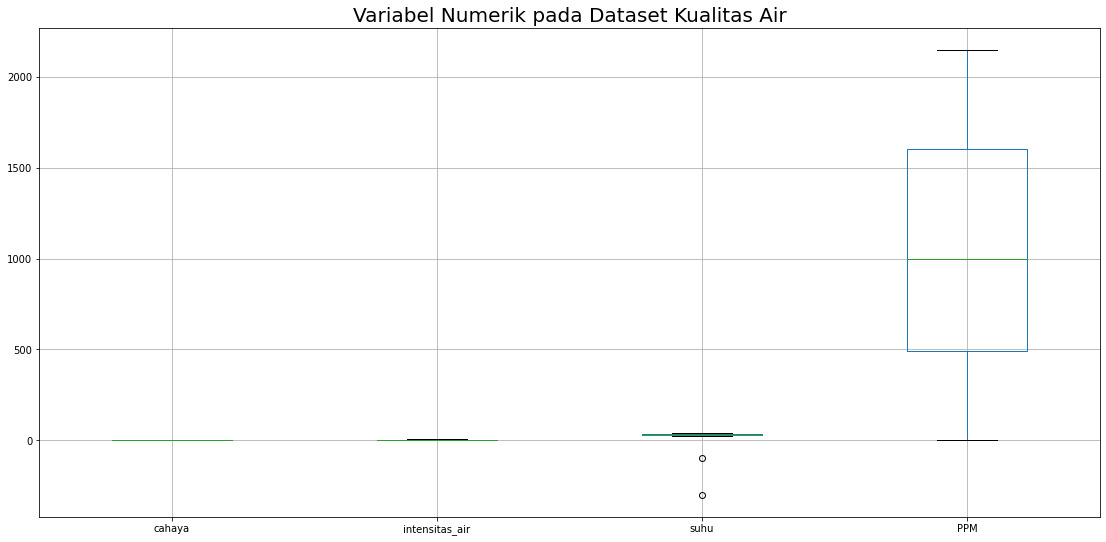

In [ ]:
num_cols = ['cahaya', 'intensitas_air', 'suhu', 'PPM']
plt.figure(figsize = (19, 9))
kualitas[num_cols].boxplot()
plt.title("Variabel Numerik pada Dataset Kualitas Air", fontsize = 20)
plt.show()

In [ ]:
# Didefinisikan menjadi X
X = kualitas.iloc[:, :4].values
X

array([[0.000e+00, 4.000e+00, 2.700e+01, 1.880e+02],
       [0.000e+00, 4.000e+00, 2.690e+01, 7.900e+01],
       [0.000e+00, 4.000e+00, 2.700e+01, 1.100e+01],
       ...,
       [0.000e+00, 1.000e+00, 2.530e+01, 7.930e+02],
       [0.000e+00, 1.000e+00, 2.540e+01, 1.052e+03],
       [0.000e+00, 1.000e+00, 2.530e+01, 9.770e+02]])

In [ ]:

Y = kualitas.iloc[:, 4].values
Y

array([4., 4., 4., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       4., 4., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       4., 4., 4., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
# Fungsi SMOTE ke dataset
# Menghitung data pada Y
counter = Counter(Y)
print(counter)

Counter({1.0: 473, 2.0: 92, 4.0: 39, 3.0: 12})


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors = 5)
X_smote, Y_smote = oversample.fit_resample(X, Y)

In [ ]:
# Menghitung data pada Y
counter = Counter(Y)
print(counter)

Counter({1.0: 473, 2.0: 92, 4.0: 39, 3.0: 12})


In [ ]:
# Melakukan trasformasi mengunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()

# Trasform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.         1.         0.96007046 0.08705773]
 [0.         1.         0.95977686 0.03631285]
 [0.         1.         0.96007046 0.00465549]
 ...
 [0.         0.         0.95507927 0.36871508]
 [0.         0.         0.95537287 0.48929236]
 [0.         0.         0.95507927 0.45437616]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 3

# Train Model and Predict
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
from sklearn import metrics

Y_predict = knn.predict(X_test)
print("Test set Akurasi: ", metrics.accuracy_score(Y_test, Y_predict))

Test set Akurasi:  0.8306451612903226


In [ ]:
Ks = 10
mean_acc = np.zeros((Ks))

for n in range(1, Ks+1):

  # Train Model and Predict
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train)
  Y_predict = neigh.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(Y_test, Y_predict)

mean_acc

array([0.86290323, 0.81451613, 0.83064516, 0.81451613, 0.81451613,
       0.7983871 , 0.7983871 , 0.77419355, 0.78225806, 0.7983871 ])

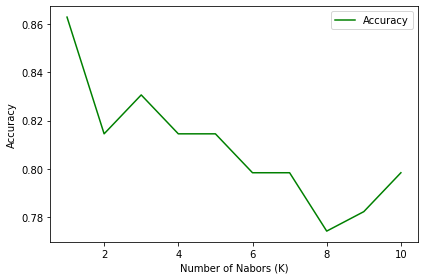

In [ ]:
plt.plot(range(1, Ks+1), mean_acc, 'g')
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8629032258064516 with k= 1
